# Week - 5 Excercise - 1 - DSE 3159
By-

Pratinav Seth 200968216

## 1. Read documentation about The Keras functional API is a way to create models.
https://www.tensorflow.org/guide/keras/functional

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 2. Using the Scikit-Learn’s fetch_california_housing() function to download the California Housing Problem data.

In [ ]:
X,y=sklearn.datasets.fetch_california_housing(return_X_y=True, as_frame=False)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.1, random_state=42)

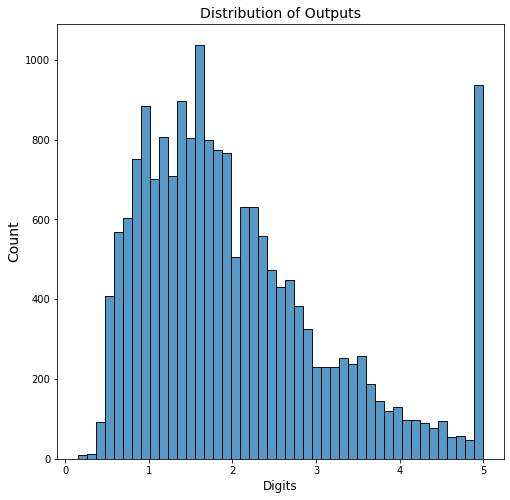

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
sns.histplot(y_train)
ax.set_title('Distribution of Outputs', fontsize=14)
ax.set_xlabel('Digits', fontsize=12)
ax.set_ylabel('Count', fontsize=14)
plt.show()

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

#### Helper Function for R-2 Score

In [ ]:
from keras import backend as K

def coeff_determination(y_true, y_pred):
    SS_res =  K.sum(K.square( y_true-y_pred ))
    SS_tot = K.sum(K.square( y_true - K.mean(y_true) ) )
    return ( 1 - SS_res/(SS_tot + K.epsilon()) )

## 3. Using the sequential API build a regression MLP ( to make predications. Model can have 1 hidden layer with 30 units. Visualize the MSE for 20 epochs. Comment on overall accuracy

In [ ]:
input_shape = X[0].shape
inputs = keras.Input(shape=input_shape)
dense = layers.Dense(30, activation="linear")
x = dense(inputs)
outputs = layers.Dense(1)(x)
model = keras.Model(inputs=inputs, outputs=outputs, name="model")
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 30)                270       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


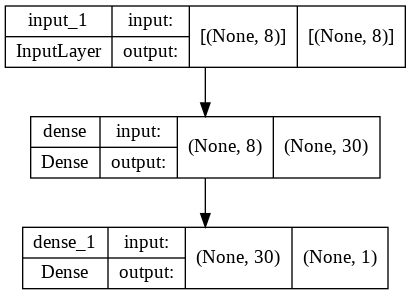

In [ ]:
keras.utils.plot_model(model, "q3.png", show_shapes=True)

In [ ]:
model.compile(
    loss=keras.losses.MeanSquaredError(),
    optimizer=keras.optimizers.Adam(),
    metrics=[coeff_determination]
)

history = model.fit(X_train, y_train, batch_size=16, epochs=20, validation_data=(X_valid, y_valid))

test_scores = model.evaluate(X_test, y_test, verbose=2)
print("Test loss:", test_scores)

Epoch 1/20
1161/1161 [==============================] - 3s 2ms/step - loss: 2.7277 - coeff_determination: -1.1595 - val_loss: 0.5932 - val_coeff_determination: 0.4914
Epoch 2/20
1161/1161 [==============================] - 2s 2ms/step - loss: 1.2291 - coeff_determination: -0.1311 - val_loss: 0.5571 - val_coeff_determination: 0.5280
Epoch 3/20
1161/1161 [==============================] - 2s 2ms/step - loss: 0.6997 - coeff_determination: 0.4482 - val_loss: 0.5790 - val_coeff_determination: 0.4999
Epoch 4/20
1161/1161 [==============================] - 2s 2ms/step - loss: 0.5520 - coeff_determination: 0.5302 - val_loss: 0.5604 - val_coeff_determination: 0.5244
Epoch 5/20
1161/1161 [==============================] - 2s 2ms/step - loss: 0.5459 - coeff_determination: 0.5206 - val_loss: 0.5653 - val_coeff_determination: 0.5224
Epoch 6/20
1161/1161 [==============================] - 2s 2ms/step - loss: 0.5386 - coeff_determination: 0.5400 - val_loss: 0.5821 - val_coeff_determination: 0.5061
Ep

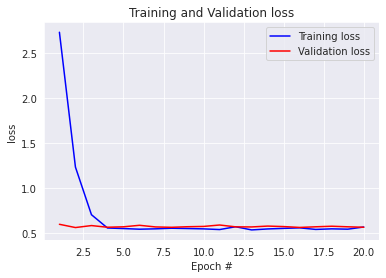

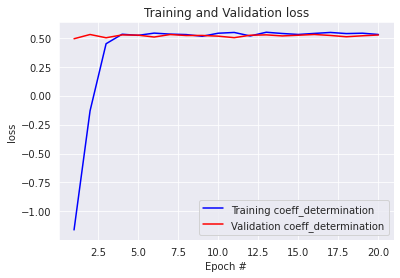

In [ ]:
sns.set_style("darkgrid")
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_d = range(1, len(loss) + 1)
plt.plot(epochs_d, loss, 'b', label='Training loss')
plt.plot(epochs_d, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

loss = history.history['coeff_determination']
val_loss = history.history['val_coeff_determination']
epochs_d = range(1, len(loss) + 1)
plt.plot(epochs_d, loss, 'b', label='Training coeff_determination')
plt.plot(epochs_d, val_loss, 'r', label='Validation coeff_determination')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


In [ ]:
print("Test loss:", test_scores[0])
print("Test R2-Score:", test_scores[1])

print("Validation loss:", history.history['val_loss'][-1])
print("Validation R2-Score:", history.history['val_coeff_determination'][-1])

print("Train loss:", history.history['loss'][-1])
print("Train R2-Score:", history.history['coeff_determination'][-1])

Test loss: 0.5602114200592041
Test R2-Score: 0.5591359734535217
Validation loss: 0.5602113008499146
Validation R2-Score: 0.5236368775367737
Train loss: 0.5630755424499512
Train R2-Score: 0.5281426310539246


###Observation
As seen in the graph above the model is able to generalize well as we can see in the epoch vs error graph both training and valiadation curve converges .

With Test Loss similar and R2-Score better than train and valid. We can say model is neither underfitting nor overfitting.

## 4. Using functional API build the following Wide & Deep Neural Network with the following architecture.

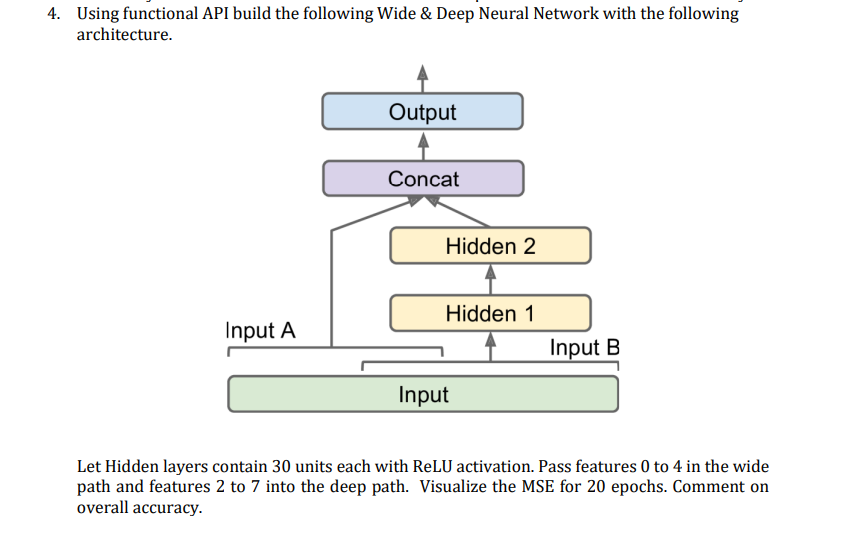

In [ ]:
input_A = keras.layers.Input(shape=[5])
input_B = keras.layers.Input(shape=[6])
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

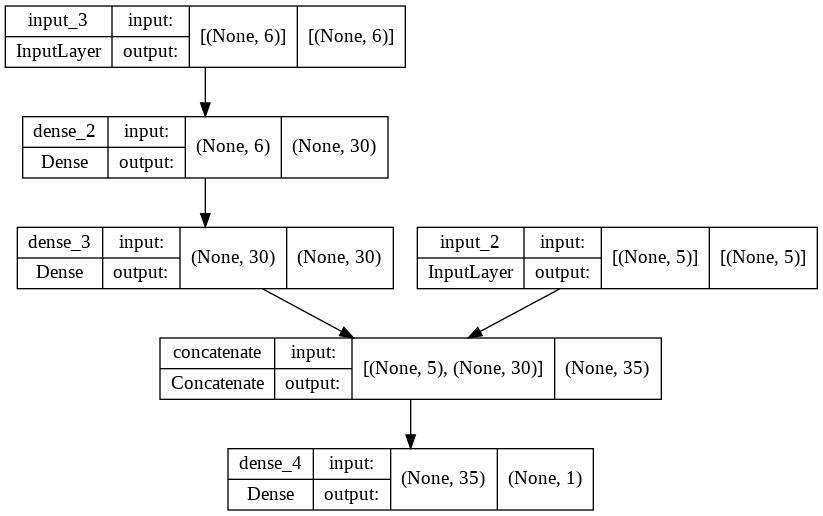

In [ ]:
keras.utils.plot_model(model, "q4.png", show_shapes=True)

In [ ]:
model.compile(loss="mse", optimizer="adam",metrics=[coeff_determination])

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,validation_data=((X_valid_A, X_valid_B), y_valid))
test_scores = model.evaluate((X_test_A, X_test_B), y_test)

print(test_scores)

Epoch 1/20
581/581 [==============================] - 1s 1ms/step - loss: 1.4389 - coeff_determination: -0.1514 - val_loss: 0.6315 - val_coeff_determination: 0.5060
Epoch 2/20
581/581 [==============================] - 1s 1ms/step - loss: 0.5545 - coeff_determination: 0.5597 - val_loss: 0.4889 - val_coeff_determination: 0.6151
Epoch 3/20
581/581 [==============================] - 1s 1ms/step - loss: 0.4474 - coeff_determination: 0.6427 - val_loss: 0.4257 - val_coeff_determination: 0.6672
Epoch 4/20
581/581 [==============================] - 1s 1ms/step - loss: 0.4009 - coeff_determination: 0.6766 - val_loss: 0.3956 - val_coeff_determination: 0.6910
Epoch 5/20
581/581 [==============================] - 1s 1ms/step - loss: 0.3728 - coeff_determination: 0.7025 - val_loss: 0.3865 - val_coeff_determination: 0.6966
Epoch 6/20
581/581 [==============================] - 1s 1ms/step - loss: 0.3571 - coeff_determination: 0.7154 - val_loss: 0.3715 - val_coeff_determination: 0.7094
Epoch 7/20
581/

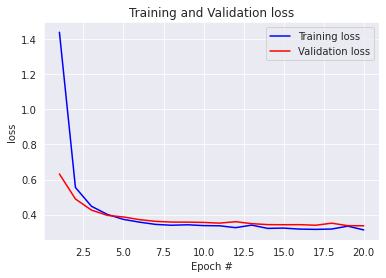

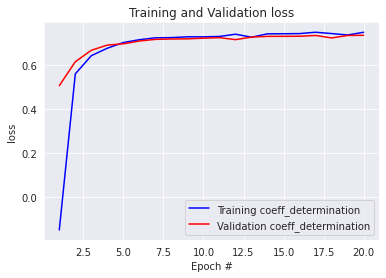

In [ ]:
sns.set_style("darkgrid")
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_d = range(1, len(loss) + 1)
plt.plot(epochs_d, loss, 'b', label='Training loss')
plt.plot(epochs_d, val_loss, 'r', label='Validation loss')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

loss = history.history['coeff_determination']
val_loss = history.history['val_coeff_determination']
epochs_d = range(1, len(loss) + 1)
plt.plot(epochs_d, loss, 'b', label='Training coeff_determination')
plt.plot(epochs_d, val_loss, 'r', label='Validation coeff_determination')
plt.xlabel('Epoch #')
plt.ylabel('loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


In [ ]:
print("Test loss:", test_scores[0])
print("Test R2-Score:", test_scores[1])

print("Validation loss:", history.history['val_loss'][-1])
print("Validation R2-Score:", history.history['val_coeff_determination'][-1])

print("Train loss:", history.history['loss'][-1])
print("Train R2-Score:", history.history['coeff_determination'][-1])

Test loss: 0.33629563450813293
Test R2-Score: 0.7355276942253113
Validation loss: 0.33629563450813293
Validation R2-Score: 0.7355276942253113
Train loss: 0.3128356337547302
Train R2-Score: 0.7492940425872803


###Observation
As seen in the graph above the model is able to generalize well as we can see in the epoch vs error graph both training and valiadation curve converges .

However Train Loss is lower and R2-Score is higher in training phase compared to test and valid thus we come to inference model is overfitting.